In [162]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
df = sns.load_dataset('penguins')
# Clean up the data
df = df.dropna()

print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

# Question 1
## How does a typical penguin beak look like?

-  ## What is a "typical" penguin? 



 Average bill length: 43.99279279279279 
 Average bill depth: 17.164864864864864


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

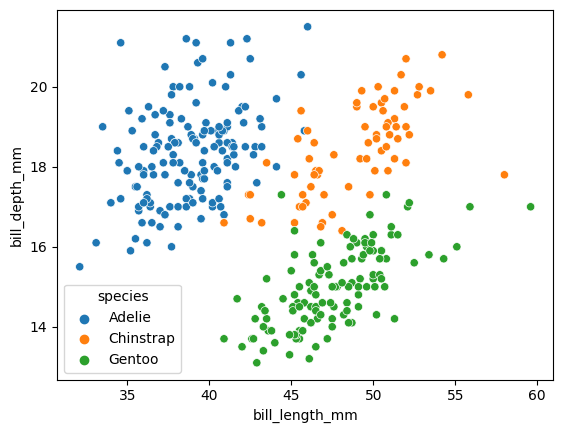

In [152]:
# Geral mean bill length and depth
mean_bill_length = df['bill_length_mm'].mean()
mean_bill_depth = df['bill_depth_mm'].mean()

print(f' Average bill length: {mean_bill_length} \n Average bill depth: {mean_bill_depth}')


# Plot the beaks dimensions with a scatter plot
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

## Answer

#### Altough the plot shows that the typical beak can either be the one from an Adelie penguin or the one from a Gentoo one, we are not considering the "Island" factor, which would be fundamental for answering this question.

# Question 2
- ## What is the distribution of beak lengths and widths for different species?

### Divide population by species and calculate the average bill's lenght

In [153]:
# Divide penguins per species
ad = df[df['species'] == 'Adelie']
ch = df[df['species'] == 'Chinstrap']
gen = df[df['species'] == 'Gentoo']

### Plot the distribution of the beaks lenght per species

Text(0.5, 1.0, "Gentoo's bill depth")

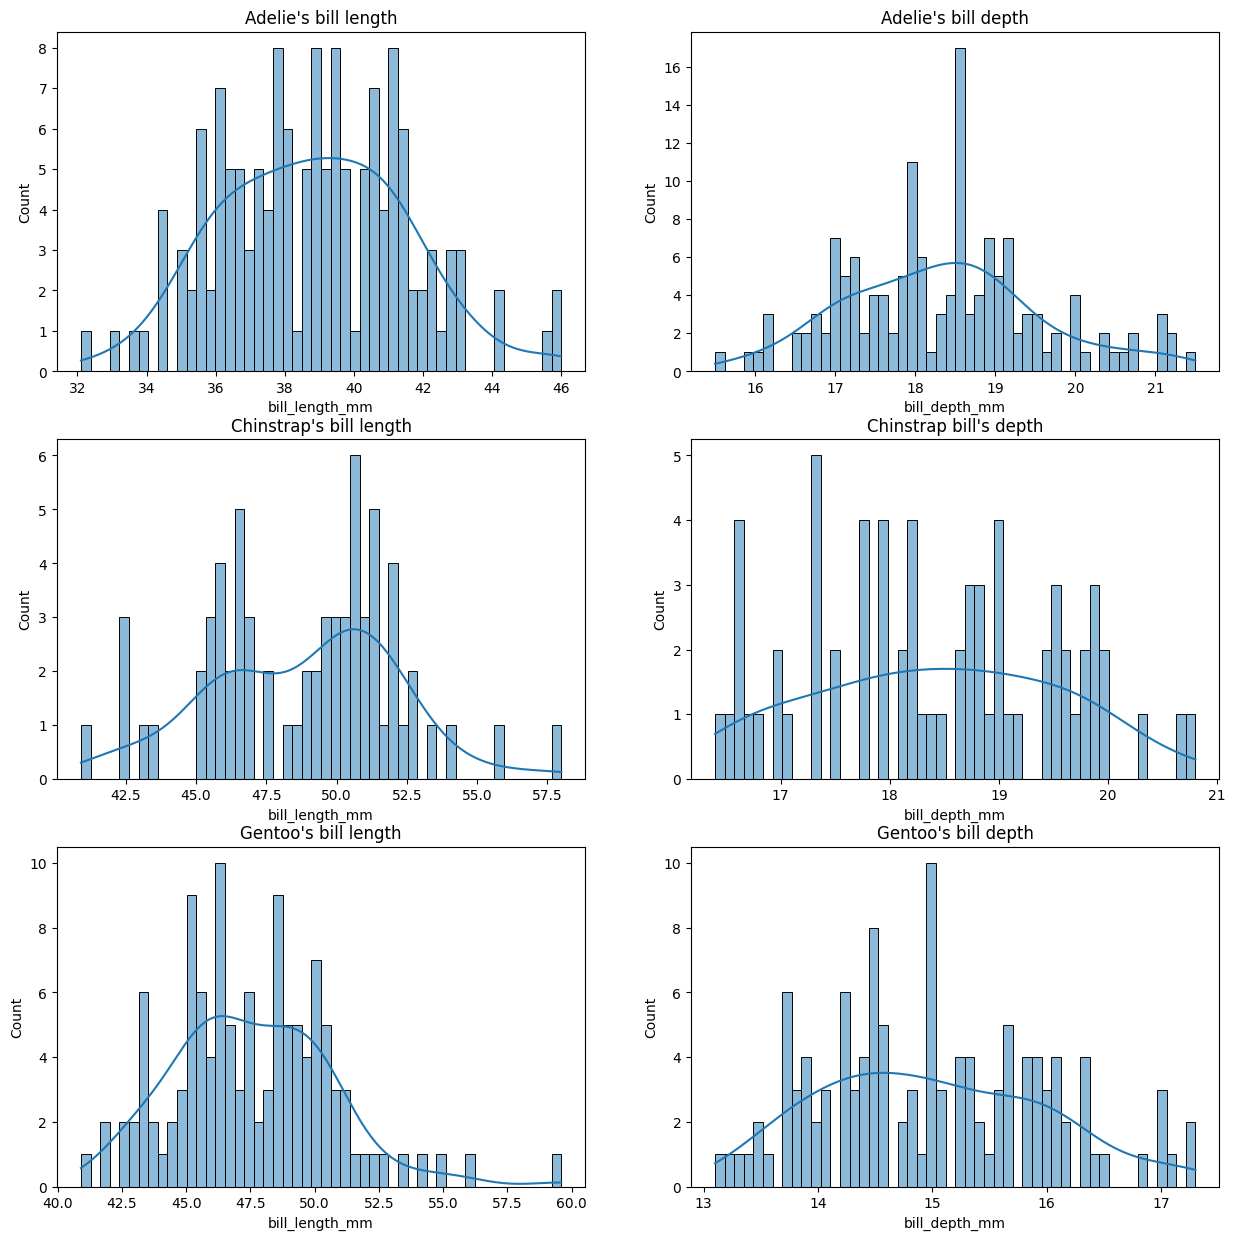

In [154]:
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))


# Plot beaks length for Adelie penguins
sns.histplot(ad['bill_length_mm'], kde=True, ax=axs[0,0], bins=50)
axs[0,0].set_title("Adelie's bill length")
# Plot beaks depth for Adelie penguins
sns.histplot(ad['bill_depth_mm'], kde=True, ax=axs[0,1], bins=50)
axs[0,1].set_title("Adelie's bill depth")

# Plot beaks length for Chinstrap penguins
sns.histplot(ch['bill_length_mm'], kde=True, ax=axs[1,0], bins=50)
axs[1,0].set_title("Chinstrap's bill length")
# Plot beaks depth for Chinstrap penguins
sns.histplot(ch['bill_depth_mm'], kde=True, ax=axs[1,1], bins=50)
axs[1,1].set_title("Chinstrap bill's depth")

# Plot beaks length for Gentoo penguins
sns.histplot(gen['bill_length_mm'], kde=True, ax=axs[2,0], bins=50)
axs[2,0].set_title("Gentoo's bill length")
# Plot beaks depth for geninstrap penguins
sns.histplot(gen['bill_depth_mm'], kde=True, ax=axs[2,1], bins=50)
axs[2,1].set_title("Gentoo's bill depth")

## Answer

#### - Adelie's distribution seem to be a gaussian distribution for both the length and depth
#### - Chinstrap's distribution seem to be a bimodal for the length and gaussian for the depth
#### - Gentoo's distribution seem to be a skewed to the left for the length and gaussian for the depth

the data is not sufficient to give a clear answer

# Question 3
- ## Which species have long and slim beaks, which are rather short and wide?


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

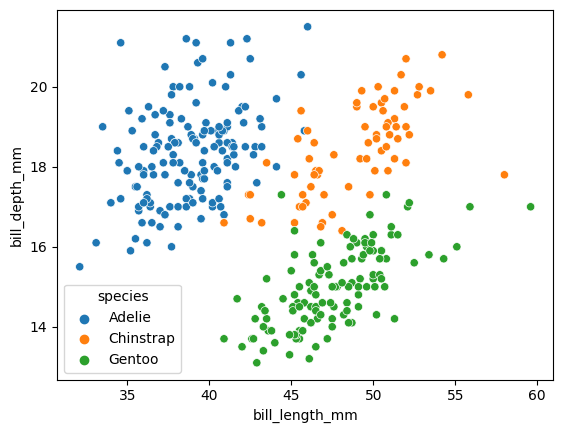

In [155]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

## Answer

#### From the scatterplot we can clearly notice that Adelie's penguin tend to have short and large beaks and Gentoo's long and slims ones

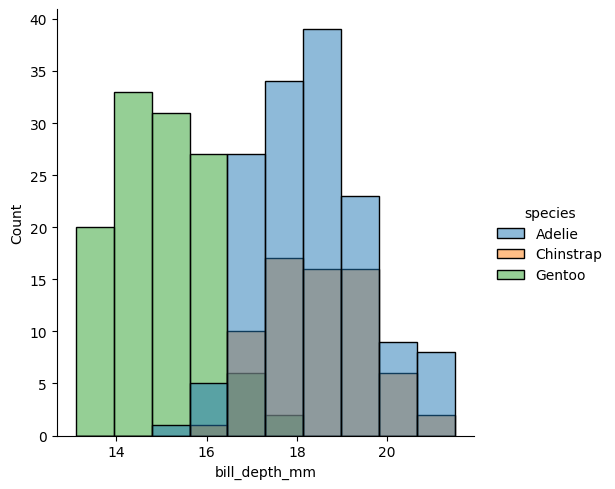

In [156]:
# Plot bills depth per species 
sns.displot(df, x="bill_depth_mm", hue="species")

# Question 4

- ## Are the beak sizes in the most prevalent species correlated with any other feature of a penguin?

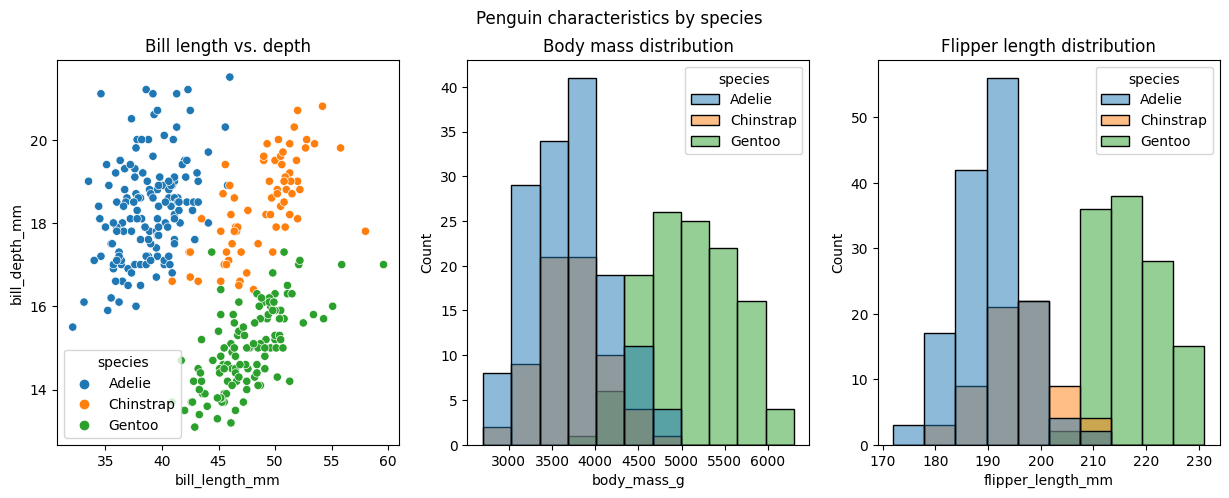

In [179]:
# Create a figure with one row and three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the difference of bills per species and island by length and depth
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axs[0])
axs[0].set_title('Bill length vs. depth')

# Plot the distribution of body mass per species
sns.histplot(data=df, x='body_mass_g', hue='species', ax=axs[1])
axs[1].set_title('Body mass distribution')

# Plot the distribution of flipper length per species
sns.histplot(data=df, x='flipper_length_mm', hue='species', ax=axs[2])
axs[2].set_title('Flipper length distribution')

# Add a title to the figure
fig.suptitle('Penguin characteristics by species')

# Show the plot
plt.show()


## Answer
- ## Beak dimension - Body mass
    - ### Chinstrap, which have the biggest beak, aren't the heaviest
    - ### Gentoo, which have a slim, and long beak are the the heaviest species
    - ### Adelie, which have a large and short beak are the lightest species together with Chinstrap
- ## Beak dimension - Flipper length
    - ### Chinstrap, which have the biggest beak, don't have the longest flippers
    - ### Gentoo, which have a slim, and long beak, have the longest flippers
    - ### Adelie, which have a large and short beak, have the shortest flippers
- ## Beak dimension - Population
    - ### The biggest species present in the dataset is the Adelie. They are also present in all the islands, so we can deduce their body may be the most suited for suriving